
# TASK 1 : ANALYSIS OF CDR's Milan


In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')
import sys
import datetime
from datetime import datetime as dt
import pytz

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:

'''
Reading files from 1st December to 10th December
Then will append every dataframe to get one file
'''
df_dec_1 = pd.DataFrame({})
for i in range(1,10):
    df = pd.read_csv('/content/drive/MyDrive/CDR_Dec/sms-call-internet-mi-2013-12-0{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_dec_1=df_dec_1.append(df)


In [6]:
'''
Reading the datafiles from 11th to 20th December
'''
for i in range(0,10):
    df1 = pd.read_csv('/content/drive/MyDrive/CDR_Dec/sms-call-internet-mi-2013-12-1{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_dec_1=df_dec_1.append(df1)


In [7]:
'''
Reading the datafiles from 21st to 30th December
'''

for i in range(0,10):
    df1 = pd.read_csv('/content/drive/MyDrive/CDR_Dec/sms-call-internet-mi-2013-12-2{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_dec_1=df_dec_1.append(df1)


In [10]:
'''
For the last two days of December
'''
for i in range(0,2):
    df1 = pd.read_csv('/content/drive/MyDrive/CDR_Dec/sms-call-internet-mi-2013-12-3{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None,
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df_dec_1=df_dec_1.append(df1)


In [11]:
df_dec_1.head(10)

,squareid,datetime,countrycode,smsin,smsout,callin,callout,internet
0,1,2013-11-30 23:00:00,39,0.110989,0.166214,0.109202,0.164427,13.648438
1,1,2013-11-30 23:00:00,46,NaN,NaN,NaN,NaN,0.026137
2,1,2013-11-30 23:10:00,39,0.165137,0.176399,0.030875,0.027300,13.330858
3,1,2013-11-30 23:20:00,0,0.029088,0.027300,NaN,NaN,NaN
4,1,2013-11-30 23:20:00,39,0.186451,0.136588,0.054601,NaN,11.329552
5,1,2013-11-30 23:30:00,39,0.219652,0.381129,0.082526,0.135964,13.166163
6,1,2013-11-30 23:40:00,39,0.295114,0.110450,0.054601,0.079575,13.321653
7,1,2013-11-30 23:40:00,46,NaN,NaN,NaN,NaN,0.026137
8,1,2013-11-30 23:50:00,39,0.052275,0.135425,0.053438,0.027300,12.434744
9,1,2013-12-01 00:00:00,0,0.026137,NaN,NaN,NaN,NaN


In [12]:
df_dec_1.tail(10)

,squareid,datetime,countrycode,smsin,smsout,callin,callout,internet
4968029,9999,2013-12-31 22:30:00,0,0.435518,NaN,NaN,NaN,NaN
4968030,9999,2013-12-31 22:30:00,39,3.533383,2.542648,0.446588,0.663222,22.258378
4968031,9999,2013-12-31 22:40:00,0,0.151053,0.014708,NaN,0.085995,NaN
4968032,9999,2013-12-31 22:40:00,1,NaN,NaN,NaN,0.014708,NaN
4968033,9999,2013-12-31 22:40:00,380,NaN,NaN,NaN,0.085995,NaN
4968034,9999,2013-12-31 22:40:00,39,2.884706,3.874651,0.501603,0.561655,24.439419
4968035,9999,2013-12-31 22:50:00,0,0.453159,NaN,NaN,0.085995,NaN
4968036,9999,2013-12-31 22:50:00,389,0.088767,NaN,NaN,NaN,NaN
4968037,9999,2013-12-31 22:50:00,39,5.109877,2.491444,0.202761,0.703007,21.462258
4968038,9999,2013-12-31 22:50:00,48,0.014708,NaN,NaN,NaN,NaN


In [13]:
#Converting datetime to CET for further Analysis
#Merging Columns Smsin with smsout to get a new column sms, same is done with calls.
df_dec_1['datetime'] = pd.to_datetime(df_dec_1.datetime, unit='ms', utc=True).dt.tz_convert('CET').dt.tz_localize(None)
df_dec_1['sms'] = df_dec_1['smsin'] + df_dec_1['smsout']
df_dec_1['calls']=df_dec_1['callin']+df_dec_1['callout']

'''
Dropping columns after merging
'''
df_dec_1.drop(columns=['smsin', 'smsout','callin','callout'])
#Grouping by Datetime and Square Id
df_dec_1 = df_dec_1[['datetime', 'squareid', 'internet', 'sms', 'calls']].groupby(['datetime', 'squareid'], as_index=False).sum()
'''
Filling Na/Nan values with 0 for analyzing purposes
'''
df_dec_1.fillna(0)


,datetime,squareid,internet,sms,calls
0,2013-12-01 00:00:00,1,13.674575,0.277204,0.273629
1,2013-12-01 00:00:00,2,13.700010,0.275825,0.273982
2,2013-12-01 00:00:00,3,13.727084,0.274357,0.274357
3,2013-12-01 00:00:00,4,13.600904,0.281197,0.272607
4,2013-12-01 00:00:00,5,12.377765,0.255395,0.245554
...,...,...,...,...,...
44609373,2013-12-31 23:50:00,9996,34.165195,11.157164,1.445025
44609374,2013-12-31 23:50:00,9997,39.097692,11.435903,1.767133
44609375,2013-12-31 23:50:00,9998,38.172750,11.396417,1.698478
44609376,2013-12-31 23:50:00,9999,21.462258,7.601322,0.905768


In [14]:
df_dec_1.describe()

,squareid,internet,sms,calls
count,4.460938e+07,4.460938e+07,4.460938e+07,4.460938e+07
mean,5.001007e+03,5.776938e+01,5.497571e+00,6.143158e+00
std,2.887284e+03,1.108418e+02,1.380580e+01,1.544162e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.500000e+03,1.066237e+01,2.731495e-01,8.983532e-02
50%,5.001000e+03,2.563426e+01,1.582793e+00,1.470284e+00
75%,7.502000e+03,5.913458e+01,5.211691e+00,5.862451e+00
max,1.000000e+04,6.995387e+03,1.385218e+03,8.275561e+02


In [15]:
df_dec_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44609378 entries, 0 to 44609377
Data columns (total 5 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   squareid  int64         
 2   internet  float64       
 3   sms       float64       
 4   calls     float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.7 GB


In [19]:
#Checking for null values
df_dec_1.isnull().sum()

datetime    0
squareid    0
internet    0
sms         0
calls       0
dtype: int64

# Analyzing CDR(Internet Activity) in a geo-location for the month of December'2013

In [20]:
df_dec_1.head(5)

,datetime,squareid,internet,sms,calls
0,2013-12-01,1,13.674575,0.277204,0.273629
1,2013-12-01,2,13.700010,0.275825,0.273982
2,2013-12-01,3,13.727084,0.274357,0.274357
3,2013-12-01,4,13.600904,0.281197,0.272607
4,2013-12-01,5,12.377765,0.255395,0.245554


In [21]:
df_dec_1.tail()

,datetime,squareid,internet,sms,calls
44609373,2013-12-31 23:50:00,9996,34.165195,11.157164,1.445025
44609374,2013-12-31 23:50:00,9997,39.097692,11.435903,1.767133
44609375,2013-12-31 23:50:00,9998,38.172750,11.396417,1.698478
44609376,2013-12-31 23:50:00,9999,21.462258,7.601322,0.905768
44609377,2013-12-31 23:50:00,10000,15.439858,4.888892,0.824866


In [15]:
'''
Checking if there are any null values before goinh further with the analysis
'''
df_dec_1.isnull().sum()

datetime    0
squareid    0
internet    0
sms         0
calls       0
dtype: int64

In [22]:
df_dec_1['internet'].describe()

count    4.460938e+07
mean     5.776938e+01
std      1.108418e+02
min      0.000000e+00
25%      1.066237e+01
50%      2.563426e+01
75%      5.913458e+01
max      6.995387e+03
Name: internet, dtype: float64

In [23]:
import seaborn as sns
import plotly.express as px

<Axes: xlabel='internet'>

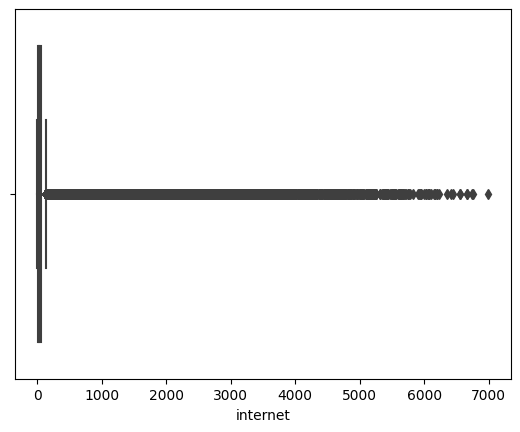

In [24]:
'''
Generally, if we have a single data column(internet) and you want to check for outliers
within that column, you can place the data on the y-axis.
 This way, you can easily visualize the distribution of your data and identify any outliers.
'''

sns.boxplot(x=df_dec_1['internet'])

 There are some outlier in the data column for internet activity in December as same as November, not a good idea to remove them as they might be from area with highest activity.


In [42]:
#fig=px.histogram(df_dec_1,x='internet',y='Frequency')
#fig.show()
ax = df_dec_1['internet'].plot.hist(bins=12, alpha=0.5)

We can see from the boxplot and the histogram that there are outliers present in the data. As having a data that follows normal distribution, Z-score it used to calculate the outliers. But since our data is skewed we should not use Z-score. Instead we can find Inter-Quartile ranges for our data.

#  Using IQR(Statistical Method) to calculate Outliers

Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR) instead of using Z-score. Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).

In [ ]:

    Q1=df_dec_1.quantile(0.25)
    Q3=df_dec_1.quantile(0.75)
    IQR=Q3-Q1
    outliers= df_dec_1[((df_dec_1<(Q1-1.5*IQR)) | (df_dec_1>(Q3+1.5*IQR)))]
    print(outliers)

TypeError: Invalid comparison between dtype=datetime64[ns] and ndarray


Since date time is a floating ndarray, it is causing an exception. Also figuring it from the box plot and histogram
it might not be the best case to remove outliers as they might be from peak traffic areas. It need be we can drop
it later.


In [31]:

from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

Checking correlation between variables in the dataframe.
Correlation is used to analyze the strength and direction between two quantitative variables.
It is denoted by r and values between -1 and +1. A positive value for r indicates a positive association and a
negative value for r indicates a negative association.

In [28]:
'''
Using python corr() method to find it.''

Arguments:corr(method='pearson/kendall', min_periods=1, numeric_only=False)

min_periods->int type minimum number of observations required per pair of columns in a dataframe

numeric_onlu->Bool type default False
'''

corr_cdr_nov=df_dec_1.corr()

corr_cdr_nov.style.background_gradient(cmap = 'magma')


,squareid,internet,sms,calls
squareid,1.000000,0.135883,0.107173,0.107913
internet,0.135883,1.000000,0.845633,0.830230
sms,0.107173,0.845633,1.000000,0.883000
calls,0.107913,0.830230,0.883000,1.000000


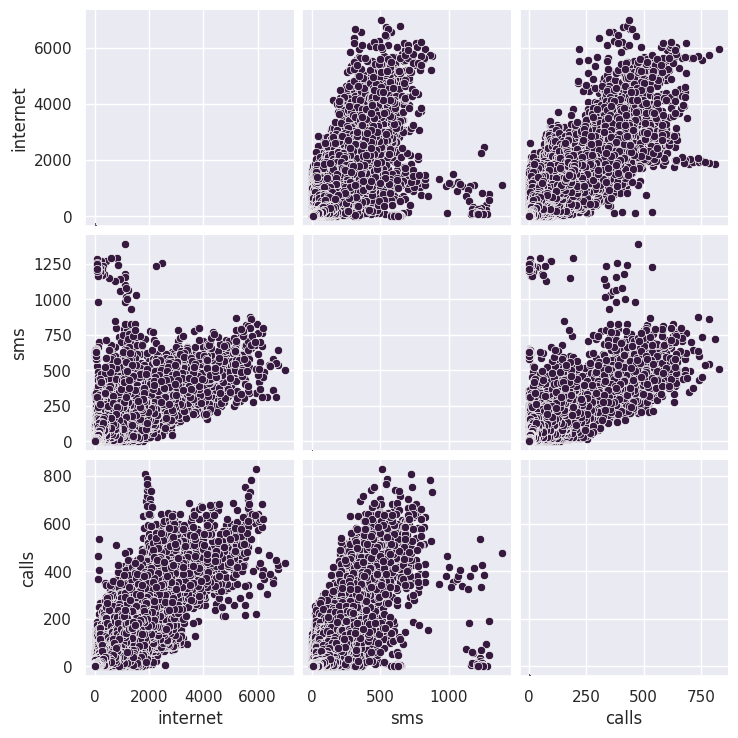

In [30]:
sns.set()
sns.set_palette("rocket")
columns = ['internet', 'sms', 'calls']
sns.pairplot(df_dec_1[columns], size = 2.5)
plt.show();


High positive correlation between sms, calls and internet.
Focusing on internet traffic for this analysis


In [32]:
import scipy
from scipy import stats

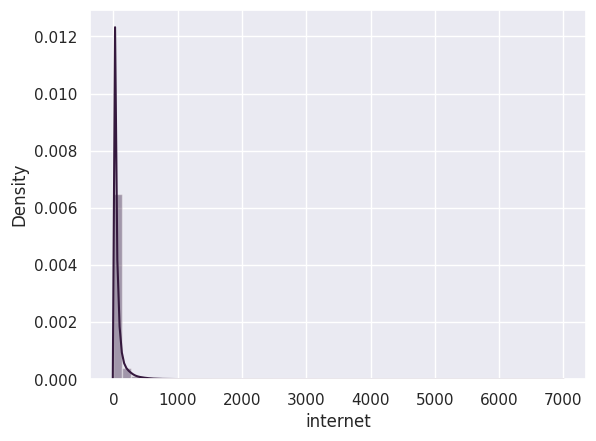

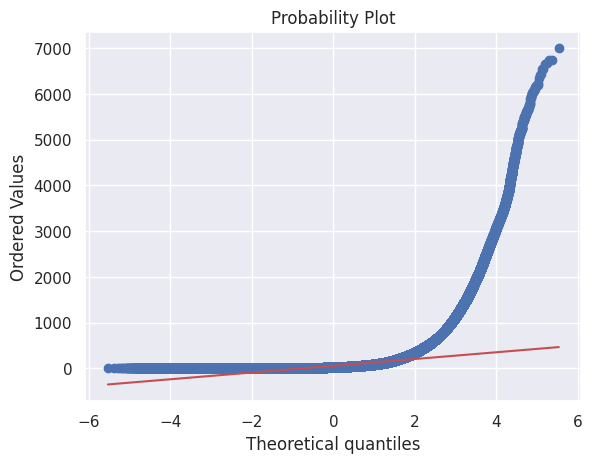

In [38]:
'''
Plotting histogram and probability plot of  internet traffic.
'''
fig = plt.figure()
ax = fig.gca()
sns.distplot(df_dec_1['internet'])
plt.show()

#Probability plot
fig = plt.figure()
res = stats.probplot(df_dec_1['internet'], plot=plt)

We can see from the histogram clearly that our data is right skewed. Now we will try to find the actual value of the skewness; which is important to know the asymmetrical behaviour of the data rather than doing a frequency distribution.
- Skewness = 0: Then normally distributed.
- Skewness > 0: Then more weight in the left tail of the distribution.
- Skewness < 0: Then more weight in the right tail of the distribution.

In [33]:
#Finding Skewness

scipy.stats.skew(df_dec_1['internet'])



7.975423774804531

We already knew that our data distribution was asymmetrical. Now we know that it has a long right tail, meaning it is right skewed.

<b>Checking Area with Highest Traffic<b>

In [34]:
#Returning rows in descending order based on peak values
df_peaktraffic_nov=df_dec_1.nlargest(10,['internet'])

In [35]:
df_peaktraffic_nov['day_of_week'] = df_peaktraffic_nov['datetime'].dt.day_name()

In [36]:
df_peaktraffic_nov

,datetime,squareid,internet,sms,calls,day_of_week
1014645,2013-12-01 16:50:00,5161,6995.386890,503.739407,436.385661,Sunday
1004649,2013-12-01 16:40:00,5161,6753.289589,642.786357,425.885393,Sunday
984654,2013-12-01 16:20:00,5161,6736.913504,537.590537,410.547249,Sunday
994652,2013-12-01 16:30:00,5161,6667.623702,315.737374,442.201545,Sunday
1024643,2013-12-01 17:00:00,5161,6663.225059,552.351983,447.191546,Sunday
964658,2013-12-01 16:00:00,5161,6550.887943,360.066184,367.464367,Sunday
974656,2013-12-01 16:10:00,5161,6548.403301,578.916908,349.581432,Sunday
1084629,2013-12-01 18:00:00,5161,6442.487588,533.917872,388.700408,Sunday
1044637,2013-12-01 17:20:00,5161,6412.843121,539.666831,466.559789,Sunday
934667,2013-12-01 15:30:00,5161,6346.712797,310.339459,304.598604,Sunday


<b>Few Observations<b>
    
- Squareid 5161 is the most populated area so therefore it can be said that it is the centre of Milan.
- We can also see that we are getting peak traffic for mostly Sunday which is expected.

A figure showing the distribution (Probability Density Function) of the total traffic
recorded in a geographical area (for December).
- Probability Density is done basically to find the weighted average of neighbours for kernel smoothing.
- In statistics, PDF is needed to make inferences about the population.To know more, access the link below.
- https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='internet', ylabel='Density'>

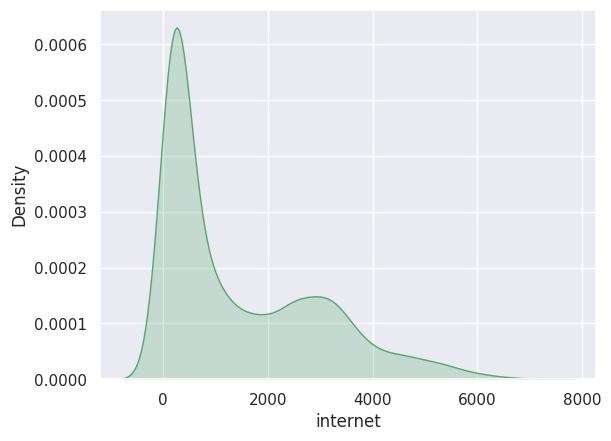

In [37]:
#Density Distribution for Square'id 5161.
sns.kdeplot(df_dec_1.loc[(df_dec_1['squareid']==5161),
            'internet'], color='g', shade=True)

References :


1.https://en.wikipedia.org/wiki
2.https://www.geeksforgeeks.org/python-data-analysis-using-pandas/
3.https://github.com/Aujasvi-Moudgil/Forecasting-Mobile-Network-Traffic



